In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## Data Processing and Saving

### read data

In [4]:
df = pd.read_csv('covid19_time_series_04092020.csv')

C:\Users\pspat\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
df.head()

,Unnamed: 0,Country,CountryCode,Lat,Lon,Confirmed,Deaths,Recovered,Active,Date,LocationID,Province,City,CityCode
0,0,Afghanistan,AF,33.94,67.71,0,0,0,0,2020-01-22T00:00:00Z,828ca7f3-144f-4732-b659-a60f97755626,NaN,NaN,NaN
1,1,Afghanistan,AF,33.94,67.71,0,0,0,0,2020-01-23T00:00:00Z,828ca7f3-144f-4732-b659-a60f97755626,NaN,NaN,NaN
2,2,Afghanistan,AF,33.94,67.71,0,0,0,0,2020-01-24T00:00:00Z,828ca7f3-144f-4732-b659-a60f97755626,NaN,NaN,NaN
3,3,Afghanistan,AF,33.94,67.71,0,0,0,0,2020-01-25T00:00:00Z,828ca7f3-144f-4732-b659-a60f97755626,NaN,NaN,NaN
4,4,Afghanistan,AF,33.94,67.71,0,0,0,0,2020-01-26T00:00:00Z,828ca7f3-144f-4732-b659-a60f97755626,NaN,NaN,NaN


### aggregate into country by day

In [14]:
country_df_regres = df.groupby(['Country','Date']).sum()[["Confirmed","Recovered","Active"]].reset_index()

In [21]:
country_df_regres.isna().sum()

Country      0
Date         0
Confirmed    0
Recovered    0
Active       0
dtype: int64

In [15]:
country_df_regres.head()

,Country,Date,Confirmed,Recovered,Active
0,Afghanistan,2020-01-22T00:00:00Z,0,0,0
1,Afghanistan,2020-01-23T00:00:00Z,0,0,0
2,Afghanistan,2020-01-24T00:00:00Z,0,0,0
3,Afghanistan,2020-01-25T00:00:00Z,0,0,0
4,Afghanistan,2020-01-26T00:00:00Z,0,0,0


#### dataset is currently in a regression friendly format--write out;

In [16]:
country_df_regres.to_csv('covid19_04092020_regver.csv')

modify to time series format and write that out too

In [34]:
country_df_ts =country_df_regres.pivot(index='Country',columns='Date',values='Confirmed')

In [35]:
country_df_ts.head()

Date,2020-01-22T00:00:00Z,2020-01-23T00:00:00Z,2020-01-24T00:00:00Z,2020-01-25T00:00:00Z,2020-01-26T00:00:00Z,2020-01-27T00:00:00Z,2020-01-28T00:00:00Z,2020-01-29T00:00:00Z,2020-01-30T00:00:00Z,2020-01-31T00:00:00Z,...,2020-03-31T00:00:00Z,2020-04-01T00:00:00Z,2020-04-02T00:00:00Z,2020-04-03T00:00:00Z,2020-04-04T00:00:00Z,2020-04-05T00:00:00Z,2020-04-06T00:00:00Z,2020-04-07T00:00:00Z,2020-04-08T00:00:00Z,2020-04-09T00:00:00Z
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,174.0,237.0,273.0,281.0,299.0,349.0,367.0,423.0,444.0,484.0
Albania,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,243.0,259.0,277.0,304.0,333.0,361.0,377.0,383.0,400.0,409.0
Algeria,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,716.0,847.0,986.0,1171.0,1251.0,1320.0,1423.0,1468.0,1572.0,1666.0
Andorra,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,376.0,390.0,428.0,439.0,466.0,501.0,525.0,545.0,564.0,583.0
Angola,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7.0,8.0,8.0,8.0,10.0,14.0,16.0,17.0,19.0,19.0


In [36]:
country_df_ts.isna().sum()

Date
2020-01-22T00:00:00Z    3
2020-01-23T00:00:00Z    2
2020-01-24T00:00:00Z    2
2020-01-25T00:00:00Z    2
2020-01-26T00:00:00Z    2
                       ..
2020-04-05T00:00:00Z    0
2020-04-06T00:00:00Z    0
2020-04-07T00:00:00Z    0
2020-04-08T00:00:00Z    0
2020-04-09T00:00:00Z    0
Length: 79, dtype: int64

In [57]:
##fill NAs w/0 as NA means the country had no recorded cases yet
country_df_ts = country_df_ts.fillna(0).reset_index()

In [58]:
##write out time series file
country_df_ts.to_csv('covid19_04092020_ts.csv')

## Basic EDA

In [1]:
country_df_regres = pd.read_csv('covid19_04092020_regver.csv')
country_df_ts = pd.read_csv('covid19_04092020_ts.csv')

NameError: name 'pd' is not defined

In [12]:
global_df = country_df_regres.groupby('Date').sum()[["Confirmed","Recovered","Active"]].reset_index()

In [13]:
fig = px.line(global_df, x="Date", y="Confirmed", 
              height=500
             )
fig.show()

In [14]:
## Noticeable weird drop at 04/04 -- check data source to see if there was a known issue

In [15]:
global_df[-10:]

,Date,Confirmed,Recovered,Active
69,2020-03-31T00:00:00Z,856773,170407,0
70,2020-04-01T00:00:00Z,931874,184100,0
71,2020-04-02T00:00:00Z,1012436,200643,0
72,2020-04-03T00:00:00Z,1095192,215470,0
73,2020-04-04T00:00:00Z,887834,230881,0
74,2020-04-05T00:00:00Z,1271386,259393,0
75,2020-04-06T00:00:00Z,1344319,275896,0
76,2020-04-07T00:00:00Z,1425371,299435,0
77,2020-04-08T00:00:00Z,1510376,328042,0
78,2020-04-09T00:00:00Z,1594621,353356,0


In [16]:
tmp = country_df_ts['2020-04-04T00:00:00Z']

In [17]:
tmp = pd.DataFrame([country_df_ts['Country'],tmp]).transpose()

In [18]:
tmp[tmp['Country']=='United States of America']

,Country,2020-04-04T00:00:00Z
173,United States of America,0


In [19]:
## Data seems to be missing for USA on 04/04/2020 but checking the source of the API, that data is not missing (in John Hopkins dataset)

## Data repulled now from API; will see if issue is resolved
df2 = pd.read_csv('covid19_time_series_04112020.csv')
df2 = df2.drop(columns='Unnamed: 0')

C:\Users\pspat\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning:

Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.



In [20]:
df2.loc[(df2['Country']=='United States of America')&(df2['Date']=='2020-04-04T00:00:00Z')]

,Country,CountryCode,Lat,Lon,Confirmed,Deaths,Recovered,Active,Date,LocationID,Province,City,CityCode


In [21]:
tst = df2.loc[(df2['Country']=='United States of America')]

In [22]:
tst.loc[254003:254923]

,Country,CountryCode,Lat,Lon,Confirmed,Deaths,Recovered,Active,Date,LocationID,Province,City,CityCode
254003,United States of America,US,36.84,-94.81,8,0,0,0,2020-04-03T00:00:00Z,7331ad67-c078-4e58-8b32-85dcdb9d0d5f,Oklahoma,Ottawa,40115
254004,United States of America,US,36.68,-76.94,3,0,0,0,2020-04-03T00:00:00Z,586cd03f-9ff8-47b3-8e5d-50bde00108d9,Virginia,Franklin City,51620
254005,United States of America,US,43.75,-88.49,43,2,0,0,2020-04-05T00:00:00Z,d87f2532-8a03-4010-ae16-d359a5368848,Wisconsin,Fond du Lac,55039
254006,United States of America,US,40.99,-112.11,142,2,0,0,2020-04-05T00:00:00Z,492f1a10-8e97-4d8f-b8e1-d2543f09f228,Utah,Davis,49011
254007,United States of America,US,43.92,-90.11,5,0,0,0,2020-04-05T00:00:00Z,4f022072-1aa7-484e-91af-4fdabc4f2015,Wisconsin,Juneau,55057
...,...,...,...,...,...,...,...,...,...,...,...,...,...
254919,United States of America,US,42.92,-72.25,10,0,0,0,2020-04-05T00:00:00Z,f82efe50-fb50-494f-9936-34434a9ffe3b,New Hampshire,Cheshire,33005
254920,United States of America,US,39.53,-79.27,3,0,0,0,2020-04-05T00:00:00Z,c92a38d8-7752-4be7-8a2d-425ae964c2ea,Maryland,Garrett,24023
254921,United States of America,US,36.67,-80.92,1,0,0,0,2020-04-05T00:00:00Z,4d5c851e-4763-473a-a927-03cec0fef54b,Virginia,Galax,51640
254922,United States of America,US,35.16,-96.62,2,1,0,0,2020-04-05T00:00:00Z,e1a915fd-9a28-4a37-8000-892eb9eb2745,Oklahoma,Seminole,40133


In [23]:
## downloaded raw single day data from JHU git repo manually; will merge into the original dataset
## emailed API dev to let them know of the problem
apr4th_df = pd.read_csv('04-04-2020.csv')
apr4th_df_us = apr4th_df.loc[apr4th_df['Country_Region']=='US']
apr4th_df_us=apr4th_df_us.drop(columns=['FIPS','Admin2','Last_Update','Combined_Key'])

In [24]:
apr4th_df_us['Country']='United States of America'
apr4th_df_us['Date']='2020-04-04T00:00:00Z'
apr4th_df_us['CityCode'] = np.NaN
apr4th_df_us['City'] =''
apr4th_df_us['LocationID'] =''

In [25]:
apr4th_df_us=apr4th_df_us.rename(columns={'Province_State':'Province','Country_Region':'CountryCode','Long_':"Lon"})

In [26]:
apr4th_df_us=apr4th_df_us[df2.columns]

In [27]:
apr4th_df_us

,Country,CountryCode,Lat,Lon,Confirmed,Deaths,Recovered,Active,Date,LocationID,Province,City,CityCode
0,United States of America,US,34.223334,-82.461707,6,0,0,0,2020-04-04T00:00:00Z,,South Carolina,,NaN
1,United States of America,US,30.295065,-92.414197,65,2,0,0,2020-04-04T00:00:00Z,,Louisiana,,NaN
2,United States of America,US,37.767072,-75.632346,8,0,0,0,2020-04-04T00:00:00Z,,Virginia,,NaN
3,United States of America,US,43.452658,-116.241552,360,3,0,0,2020-04-04T00:00:00Z,,Idaho,,NaN
4,United States of America,US,41.330756,-94.471059,1,0,0,0,2020-04-04T00:00:00Z,,Iowa,,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2467,United States of America,US,15.097900,145.673900,6,1,0,0,2020-04-04T00:00:00Z,,Northern Mariana Islands,,NaN
2473,United States of America,US,18.220800,-66.590100,452,18,0,0,2020-04-04T00:00:00Z,,Puerto Rico,,NaN
2478,United States of America,US,NaN,NaN,0,0,14652,0,2020-04-04T00:00:00Z,,Recovered,,NaN
2495,United States of America,US,18.335800,-64.896300,40,0,0,0,2020-04-04T00:00:00Z,,Virgin Islands,,NaN


In [28]:
df2use = pd.concat([df2,apr4th_df_us])

In [29]:
df2use['Active'] = df2use['Confirmed'] - df2use['Deaths'] - df2use['Recovered']

In [30]:
country_df_regres = df2use.groupby(['Country','Date']).sum()[["Confirmed","Recovered","Deaths","Active"]].reset_index()
country_df_regres.isna().sum()

Country      0
Date         0
Confirmed    0
Recovered    0
Deaths       0
Active       0
dtype: int64

In [31]:
country_df_regres.to_csv('covid19_04112020_regver.csv')

In [32]:
country_df_ts =country_df_regres.pivot(index='Country',columns='Date',values='Confirmed')
##fill NAs w/0 as NA means the country had no recorded cases yet
country_df_ts = country_df_ts.fillna(0).reset_index()
##write out time series file
country_df_ts.to_csv('covid19_04112020_ts.csv')

In [33]:
global_df = country_df_regres.groupby('Date').sum()[["Confirmed","Recovered","Deaths","Active"]].reset_index()

In [34]:
fig = px.line(global_df, x="Date", y="Confirmed", 
              height=500, title='Global Confirmed Cases'
             )
fig.show()

In [35]:
fig = px.line(country_df_regres.loc[country_df_regres['Country']=='United States of America'], x="Date", y="Confirmed", 
              height=500, title='Global Confirmed Cases'
             )
fig.show()

In [36]:
fig = px.line(country_df_regres.loc[country_df_regres['Country']=='China'], x="Date", y="Confirmed", 
              height=500, title='Global Confirmed Cases'
             )
fig.show()

In [37]:
global_df[-1:]

,Date,Confirmed,Recovered,Deaths,Active
79,2020-04-10T00:00:00Z,1690989,375477,102506,1213006


In [38]:
temp = global_df.groupby('Date')['Recovered', 'Deaths', 'Confirmed'].sum().reset_index()
temp = temp.melt(id_vars="Date", value_vars=['Recovered', 'Deaths', 'Confirmed'],
                 var_name='Case', value_name='Count')
temp.head()

fig = px.area(temp, x="Date", y="Count", color='Case', height=600,
             title='Cases over time', color_discrete_sequence = ['green', 'red', 'cyan'])
fig.update_layout(xaxis_rangeslider_visible=True)
fig.show()

C:\Users\pspat\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [39]:
df_data = country_df_regres.groupby(['Date', 'Country'])['Confirmed', 'Deaths'].max().reset_index()
df_data["Date"] = pd.to_datetime( df_data["Date"]).dt.strftime('%m/%d/%Y')

fig = px.scatter_geo(df_data, locations="Country", locationmode='country names', 
                     color=np.power(df_data["Confirmed"],0.3)-2 , size= np.power(df_data["Confirmed"]+1,0.25)-1, hover_name="Country",
                     hover_data=["Confirmed"],
                     range_color= [0, max(np.power(df_data["Confirmed"],0.25))], 
                     projection="natural earth", animation_frame="Date", 
                     color_continuous_scale=px.colors.sequential.Plasma,
                     title='COVID-19: Progression of spread'
                    )
fig.update_coloraxes(colorscale="YlOrRd")
fig.update(layout_coloraxis_showscale=False)
fig.show()

C:\Users\pspat\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



## Multiple Linear Regression Modeling

In [40]:
global_df['Date'] = pd.to_datetime(global_df['Date'])

In [41]:
mlr_global_df = global_df.copy()

In [42]:
## create lag variables from the last two weeks
for i in range(7, 15):
    mlr_global_df[f'Confirmed_lag_{i}'] = mlr_global_df['Confirmed'].shift(i)
    mlr_global_df[f'Deaths_lag_{i}'] = mlr_global_df['Deaths'].shift(i)
    mlr_global_df[f'Recovered_lag_{i}'] = mlr_global_df['Recovered'].shift(i)
    mlr_global_df[f'Active_lag{i}'] = mlr_global_df['Active'].shift(i)

In [43]:
mlr_global_df

,Date,Confirmed,Recovered,Deaths,Active,Confirmed_lag_7,Deaths_lag_7,Recovered_lag_7,Active_lag7,Confirmed_lag_8,...,Recovered_lag_12,Active_lag12,Confirmed_lag_13,Deaths_lag_13,Recovered_lag_13,Active_lag13,Confirmed_lag_14,Deaths_lag_14,Recovered_lag_14,Active_lag14
0,2020-01-22 00:00:00+00:00,554,28,17,509,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-23 00:00:00+00:00,654,30,18,606,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-24 00:00:00+00:00,941,36,26,879,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-01-25 00:00:00+00:00,1434,39,42,1353,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-01-26 00:00:00+00:00,2118,52,56,2010,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,2020-04-06 00:00:00+00:00,1344319,275896,74551,993872,781651.0,37571.0,158319.0,585761.0,719403.0,...,112839.0,332932.0,417329.0,18614.0,107327.0,291388.0,377339.0,16491.0,97848.0,263000.0
76,2020-04-07 00:00:00+00:00,1425371,299435,81850,1044086,856773.0,42096.0,170407.0,644270.0,781651.0,...,120872.0,384048.0,466941.0,21170.0,112839.0,332932.0,417329.0,18614.0,107327.0,291388.0
77,2020-04-08 00:00:00+00:00,1510376,328042,88323,1094011,931874.0,46795.0,184100.0,700979.0,856773.0,...,129449.0,435943.0,528879.0,23959.0,120872.0,384048.0,466941.0,21170.0,112839.0,332932.0
78,2020-04-09 00:00:00+00:00,1594621,353356,95440,1145825,1012436.0,52969.0,200643.0,758824.0,931874.0,...,137746.0,491605.0,592579.0,27187.0,129449.0,435943.0,528879.0,23959.0,120872.0,384048.0


In [44]:
cols=['Date','Confirmed']
lag_cols = [col for col in mlr_global_df.columns if 'Confirmed_lag_' in col]
train_cols=cols+lag_cols
mlr_conf_global_df  = mlr_global_df[train_cols]
mlr_conf_global_df['month']=mlr_conf_global_df['Date'].dt.month 
mlr_conf_global_df['day']=mlr_conf_global_df['Date'].dt.day
mlr_conf_global_df['dayofweek']=mlr_conf_global_df['Date'].dt.dayofweek
mlr_conf_global_df['seven_day_rolling_mean_confirmed'] = mlr_conf_global_df['Confirmed'].rolling(window=7).mean()
weights = np.arange(1,8)
mlr_conf_global_df['wgtd_seven_day_rolling_mean_confirmed'] = mlr_conf_global_df['Confirmed'].rolling(window=7).apply(lambda x: np.dot(x, weights)/weights.sum(), raw=True)

C:\Users\pspat\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\pspat\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\pspat\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

In [45]:
mlr_conf_global_df = mlr_conf_global_df.dropna()

In [46]:
mlr_conf_global_df

,Date,Confirmed,Confirmed_lag_7,Confirmed_lag_8,Confirmed_lag_9,Confirmed_lag_10,Confirmed_lag_11,Confirmed_lag_12,Confirmed_lag_13,Confirmed_lag_14,month,day,dayofweek,seven_day_rolling_mean_confirmed,wgtd_seven_day_rolling_mean_confirmed
14,2020-02-05 00:00:00+00:00,27635,6166.0,5578.0,2927.0,2118.0,1434.0,941.0,654.0,554.0,2,5,2,1.691343e+04,2.026971e+04
15,2020-02-06 00:00:00+00:00,30794,8234.0,6166.0,5578.0,2927.0,2118.0,1434.0,941.0,654.0,2,6,3,2.013629e+04,2.373986e+04
16,2020-02-07 00:00:00+00:00,34330,9927.0,8234.0,6166.0,5578.0,2927.0,2118.0,1434.0,941.0,2,7,4,2.362243e+04,2.728829e+04
17,2020-02-08 00:00:00+00:00,37059,12038.0,9927.0,8234.0,6166.0,5578.0,2927.0,2118.0,1434.0,2,8,5,2.719686e+04,3.064743e+04
18,2020-02-09 00:00:00+00:00,40086,16787.0,12038.0,9927.0,8234.0,6166.0,5578.0,2927.0,2118.0,2,9,6,3.052529e+04,3.386971e+04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,2020-04-06 00:00:00+00:00,1344319,781651.0,719403.0,659992.0,592579.0,528879.0,466941.0,417329.0,377339.0,4,6,0,1.101238e+06,1.184306e+06
76,2020-04-07 00:00:00+00:00,1425371,856773.0,781651.0,719403.0,659992.0,592579.0,528879.0,466941.0,417329.0,4,7,1,1.182466e+06,1.265340e+06
77,2020-04-08 00:00:00+00:00,1510376,931874.0,856773.0,781651.0,719403.0,659992.0,592579.0,528879.0,466941.0,4,8,2,1.265110e+06,1.347317e+06
78,2020-04-09 00:00:00+00:00,1594621,1012436.0,931874.0,856773.0,781651.0,719403.0,659992.0,592579.0,528879.0,4,9,3,1.348279e+06,1.429695e+06


In [215]:
num_split = 7

X = mlr_conf_global_df.drop(columns=['Confirmed','Date'])
y = mlr_conf_global_df['Confirmed']

X_train = X[:-num_split]
y_train = y[:-num_split]
X_test = X[-num_split:]
y_test = y[-num_split:]

In [55]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [56]:
y_pred = model.predict(X_test)

In [58]:
mape = (abs((y_pred -y_test) / y_test) * 100).mean()
mape

0.5218898633661796

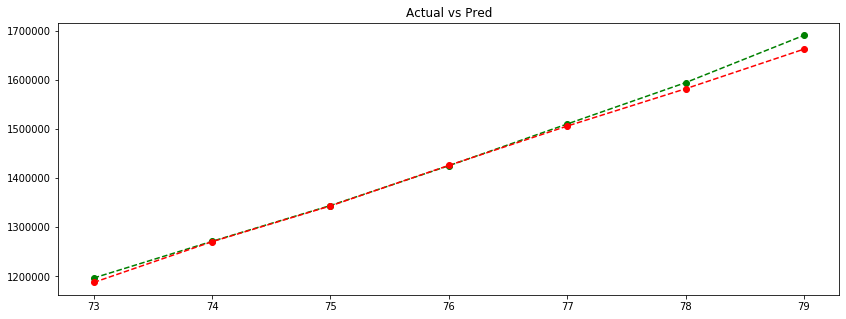

In [60]:
fig, ax = plt.subplots(figsize=(14, 5))

ax.plot(y_test, 'go--')
ax.plot(pd.Series(y_pred, index = y_test.index), 'ro--')

plt.title('Actual vs Pred')
plt.show()

In [61]:
f"MAPE: {round((abs((y_pred -y_test) / y_test) * 100).mean())}%"

'MAPE: 1%'

In [62]:
model.coef_

array([ 3.50755229e-01, -9.46466745e-02, -2.36121344e-01, -6.23674457e-02,
        7.57668977e-02,  2.00460203e-01,  9.26178723e-02, -2.44269116e-01,
        7.82943262e+03,  2.14176491e+02,  2.68008581e+02, -2.86092968e+00,
        3.70434055e+00])

In [63]:
X_test.columns

Index(['Confirmed_lag_7', 'Confirmed_lag_8', 'Confirmed_lag_9',
       'Confirmed_lag_10', 'Confirmed_lag_11', 'Confirmed_lag_12',
       'Confirmed_lag_13', 'Confirmed_lag_14', 'month', 'day', 'dayofweek',
       'seven_day_rolling_mean_confirmed',
       'wgtd_seven_day_rolling_mean_confirmed'],
      dtype='object')

In [214]:
num_split = 7
mlr_conf_global_df=mlr_conf_global_df.reset_index()
lag_cols_only =  [col for col in mlr_global_df.columns if 'Confirmed_lag_' in col]
X = mlr_conf_global_df[lag_cols_only]
y = mlr_conf_global_df['Confirmed']

X_train = X[:-num_split]
y_train = y[:-num_split]
X_test = X[-num_split:]
y_test = y[-num_split:]

ValueError: cannot insert level_0, already exists

In [90]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
f"MAPE: {round((abs((y_pred -y_test) / y_test) * 100).mean())}%"

'MAPE: 12%'

No handles with labels found to put in legend.


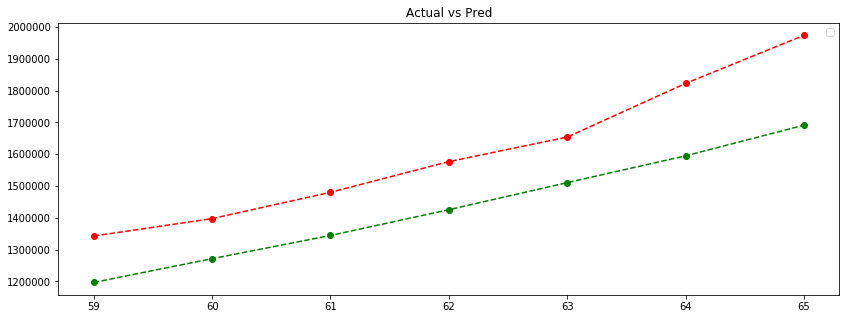

In [91]:
fig, ax = plt.subplots(figsize=(14, 5))

ax.plot(y_test, 'go--')
ax.plot(pd.Series(y_pred, index = y_test.index), 'ro--')

plt.title('Actual vs Pred')
plt.legend()
plt.show()

In [92]:
model.coef_

array([ 4.96147585, -1.81890076,  0.84290468, -0.927595  , -2.30762854,
       -0.36951356, -2.44511878,  3.51519588])

In [94]:
from sklearn.model_selection import TimeSeriesSplit

In [100]:
num_in_test = 7

test_size = float(num_in_test) / len(X)

n_splits = int((1//test_size)-1)

tscv = TimeSeriesSplit(n_splits=n_splits)

In [108]:
y_preds = []
mapes =  []
for train_index, test_index in tscv.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_preds.append(y_pred)
    mapes.append(round((abs((y_pred -y_test) / y_test) * 100).mean()))
    

TRAIN: [0 1 2 3 4 5 6 7 8 9] TEST: [10 11 12 13 14 15 16]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16] TEST: [17 18 19 20 21 22 23]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23] TEST: [24 25 26 27 28 29 30]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30] TEST: [31 32 33 34 35 36 37]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37] TEST: [38 39 40 41 42 43 44]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44] TEST: [45 46 47 48 49 50 51]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51] TEST: [52 53 54 55 56 57 58]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 2

In [106]:
np.mean(mapes)

26.25

No handles with labels found to put in legend.


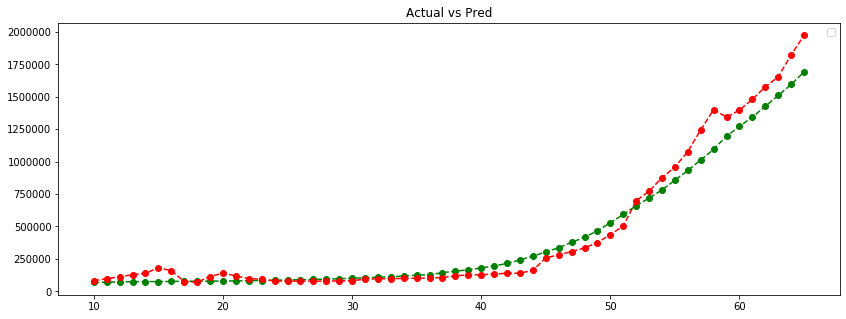

In [122]:
fig, ax = plt.subplots(figsize=(14, 5))
y_preds = [y for x in y_preds for y in x]
yplot = y[10:]
ax.plot(yplot, 'go--')
ax.plot(pd.Series(y_preds, index = yplot.index), 'ro--')

plt.title('Actual vs Pred')
plt.legend()
plt.show()

In [124]:
X = mlr_conf_global_df.drop(columns=['Confirmed','Date'])
y = mlr_conf_global_df['Confirmed']

y_preds2 = []
mapes2 =  []
for train_index, test_index in tscv.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_preds2.append(y_pred)
    mapes2.append(round((abs((y_pred -y_test) / y_test) * 100).mean()))
    

TRAIN: [0 1 2 3 4 5 6 7 8 9] TEST: [10 11 12 13 14 15 16]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16] TEST: [17 18 19 20 21 22 23]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23] TEST: [24 25 26 27 28 29 30]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30] TEST: [31 32 33 34 35 36 37]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37] TEST: [38 39 40 41 42 43 44]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44] TEST: [45 46 47 48 49 50 51]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51] TEST: [52 53 54 55 56 57 58]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 2

In [112]:
l1 = [1,2,3]

In [125]:
np.mean(mapes2)

18.625

No handles with labels found to put in legend.


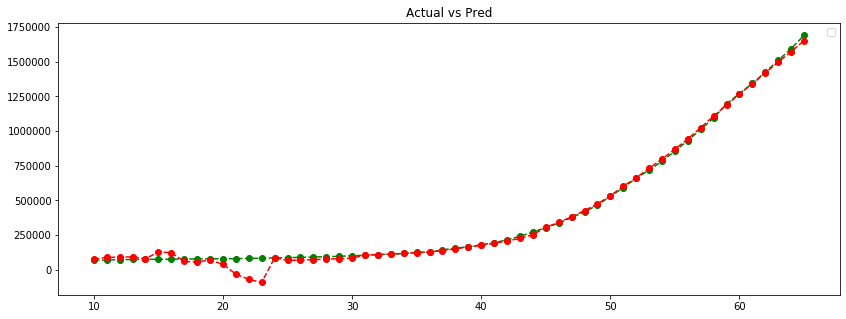

In [126]:
fig, ax = plt.subplots(figsize=(14, 5))
y_preds2 = [y for x in y_preds2 for y in x]
yplot = y[10:]
ax.plot(yplot, 'go--')
ax.plot(pd.Series(y_preds2, index = yplot.index), 'ro--')

plt.title('Actual vs Pred')
plt.legend()
plt.show()

In [226]:
y_preds_holt = []
mapes_holt =  []
for train_index, test_index in tscv.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    y_train = y.iloc[train_index]
    y_test = y.iloc[test_index]
    holtfit = ExponentialSmoothing(y_train, trend='mul',seasonal=None,damped=True).fit()
    y_pred = holtfit.forecast(7)
    y_preds_holt.append(y_pred)
    mapes_holt.append(round((abs((y_pred -y_test) / y_test) * 100).mean()))
    

TRAIN: [0 1 2 3 4 5 6 7 8 9] TEST: [10 11 12 13 14 15 16]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16] TEST: [17 18 19 20 21 22 23]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23] TEST: [24 25 26 27 28 29 30]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30] TEST: [31 32 33 34 35 36 37]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37] TEST: [38 39 40 41 42 43 44]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44] TEST: [45 46 47 48 49 50 51]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51] TEST: [52 53 54 55 56 57 58]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 2

In [227]:
np.mean(mapes_holt)

9.5

No handles with labels found to put in legend.


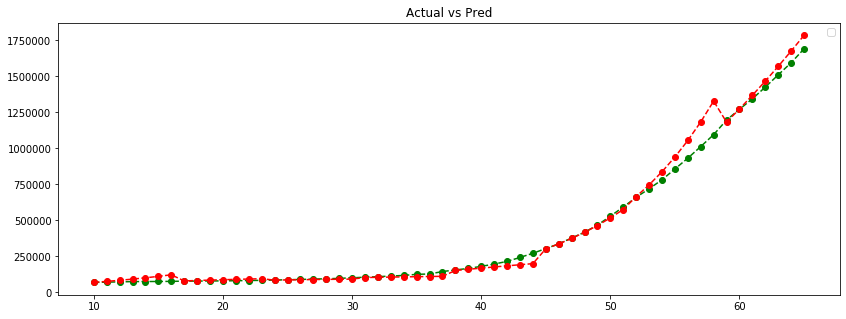

In [229]:
fig, ax = plt.subplots(figsize=(14, 5))
y_preds_holt_plot = [y for x in y_preds_holt for y in x]
yplot = y[10:]
ax.plot(yplot, 'go--')
ax.plot(pd.Series(y_preds_holt_plot, index = yplot.index), 'ro--')

plt.title('Actual vs Pred')
plt.legend()
plt.show()

In [230]:
y_preds_holt

[10     69336.706676
 11     76172.936987
 12     83683.183229
 13     91933.899785
 14    100998.093088
 15    110955.967618
 16    121895.635586
 dtype: float64,
 17    79297.697947
 18    82252.475981
 19    85048.080615
 20    87685.102613
 21    90165.676998
 22    92493.204699
 23    94672.099291
 dtype: float64,
 24    84905.226763
 25    86327.298306
 26    87636.427668
 27    88839.795567
 28    89944.457995
 29    90957.274861
 30    91884.856570
 dtype: float64,
 31    102765.897030
 32    104388.208303
 33    105920.300046
 34    107365.664375
 35    108727.873616
 36    110010.540754
 37    111217.285517
 dtype: float64,
 38    151834.922834
 39    160064.413870
 40    168194.243788
 41    176200.455085
 42    184061.736416
 43    191759.397857
 44    199277.307675
 dtype: float64,
 45    302101.131697
 46    336347.151575
 47    374475.281628
 48    416925.595754
 49    464188.054387
 50    516808.159609
 51    575393.251322
 dtype: float64,
 52    6.650356e+05
 53    7.4

In [260]:
num_in_test = 14

test_size = float(num_in_test) / len(X)

n_splits = int((1//test_size)-1)

tscv = TimeSeriesSplit(n_splits=n_splits)

y_preds_holt = []
mapes_holt =  []
for train_index, test_index in tscv.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    y_train = y.iloc[train_index]
    y_test = y.iloc[test_index]
    holtfit = ExponentialSmoothing(y_train, trend='mul',seasonal=None,damped=True).fit()
    y_pred = holtfit.forecast(len(y_test))
    y_preds_holt.append(y_pred)
    mapes_holt.append(round((abs((y_pred -y_test) / y_test) * 100).mean()))
    

TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17] TEST: [18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33] TEST: [34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49] TEST: [50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65]


In [261]:
np.mean(mapes_holt)

20.666666666666668

No handles with labels found to put in legend.


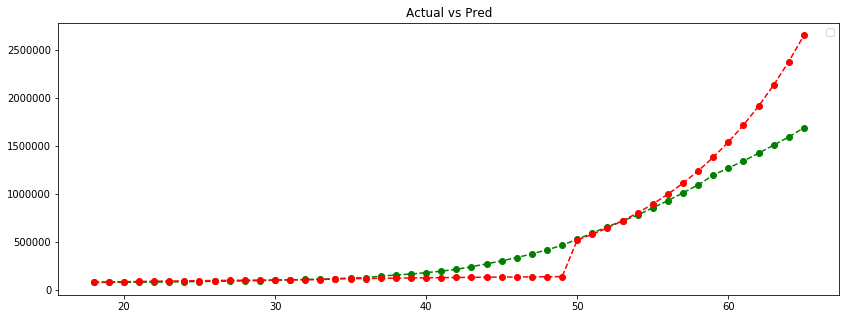

In [262]:
fig, ax = plt.subplots(figsize=(14, 5))
y_preds_holt_plot = [y for x in y_preds_holt for y in x]
yplot = y[18:]
ax.plot(yplot, 'go--')
ax.plot(pd.Series(y_preds_holt_plot, index = yplot.index), 'ro--')

plt.title('Actual vs Pred')
plt.legend()
plt.show()

In [258]:
len(y_preds_holt_plot)

44